In [2]:
# import libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

# loading data
df = pd.read_csv("/Users/maxwellpearse/Library/Mobile Documents/com~apple~CloudDocs/Life/b.Business, Money, Education,  Employment/Python/data_jobs.csv")

# cleaning data
df["job_posted_date"] = pd.to_datetime(df.job_posted_date)
df["job_skills"] = df["job_skills"].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [11]:
# Only get Data Analyst jobs in the US
df_US = df[df["job_country"] == "United States"].dropna(subset=["salary_year_avg"])

In [12]:
job_titles = df_US["job_title_short"].value_counts().index[:6].to_list()

job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [16]:
df_US_top6 = df_US[df_US["job_title_short"].isin(job_titles)]


In [24]:
job_order = df_US_top6.groupby("job_title_short")["salary_year_avg"].median().sort_values(ascending=False).index

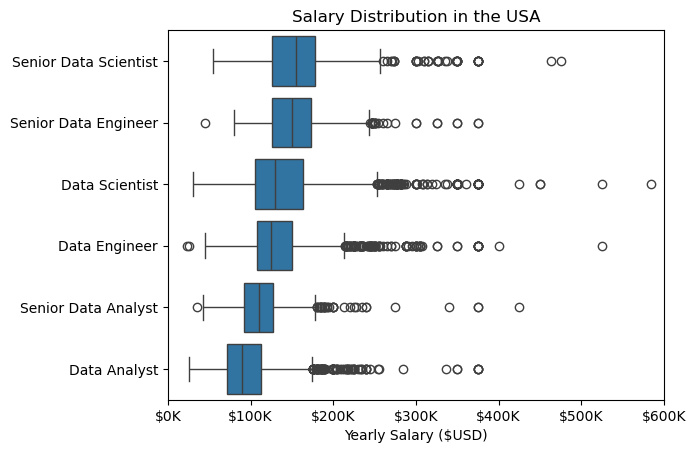

In [25]:
#plt.boxplot(job_list, labels=job_titles, vert=False)
sns.boxplot(data=df_US_top6, x="salary_year_avg", y="job_title_short", order=job_order ) # need to do x and y now! y is doing classes do the job titles
plt.title("Salary Distribution in the USA")
plt.xlabel("Yearly Salary ($USD)")
plt.ylabel("")
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))
plt.xlim(0,600000)
plt.show()